> # Introduction to Social Network Analysis in R using igraph

## Introduction to igraph in R

Igraph is a software package for generating, analyzing and plotting networks.
It supports multiple programming languages like Python and R and is one of the most
frequently used tools for network analysis.

For more info about igraph, documentation and help, you can always check their website:

http://igraph.org/r/

### Creating and exploring graph objects

We can use the igraph package to easily build graph objects in R. We can just specify relationships and igraph
will automatically build the necessary objects - very convenient!

For example, lets create a relationship between Bob and Anne. We can do this by creating a vector of relationships between nodes by listing their names in the right order.

Lets say, Bob likes Anne, therefore there is a connection between them:

Bob -> Anne

We can now but these names into a vector in the right order using the c() function, convert them into a graph object using the graph() function, and assign the object a name using the <- operator.

In [ ]:
library(igraph)

In [ ]:
# Creating a graph object by specfifying a relationship between Bob and Anne
g <- graph(c("Bob","Anne"))

we can also form a graph object from an existing dataframe if we want to import datasets into R.
For example:

In [ ]:
# Creating a column for sender and one for Nominees with one element each
Sender <- "Bob"
Nominee <- "Anne"

# binding the vectors together to a dataframe object
df <- cbind.data.frame(Sender,Nominee)

In [ ]:
# displaying the test dataframe
df

We can use the graph.data.frame()command to build graph objects from dataframes

In [ ]:
# overwriting the graph object with the graph object created from a dataframe
g <- graph.data.frame(df, directed=T)

Lets have a look at how the object is represented internally

In [ ]:
# Graph Object
g

We can see that the graph has two elements and one connection between the elements in the first line.
In the second line, we see that the elements have 1 attribute (their name) and that this attribute is stored
in  a character vector. In the third and following lines, we see a list of all relationships in the graph.

In [ ]:
# Adjacency Matrix 
g[]

One possible representation of a graph object is the so-called adjecency matrix. It specifies who is connected to whom
in the graph (1) and which elements in the graph do not have a connection (.). In the graph above, we can see that there
is only one connection from Bob to Anne.

In the language of igraph, there are two kinds ob objects: Vertices and Edges

A Vertex is an entity in the graph. That can be a node in a computer network or some other abstract concept. In our case it´s a human being. An Edge is some form of relationship between two entities. This can be a network connection or a common feature. In our case, it´s a Bob liking Anne.

NOTE: A Vertex can also be referred to as a node.

We can check all the Vertices in our network using the V() command.

In [ ]:
# Displaying all vertices in the graph
V(g)

In this example, we only have two Vertices and could´ve counted them by ourselves. For larger graphs, this might
not be feasible. We can use the vcount() command to count all Vertices in a graph object.

In [ ]:
# Counting all vertices in the graph
vcount(g)

Similarly, we can also check all the edges in our graph

In [ ]:
# Displaying all edges in the graph
E(g)

In [ ]:
# Counting all edges in the graph
ecount(g)

### Simple Plotting of graph objects

We can easily visualize our graph with the plot() command. for help, see ?plot()

In [ ]:
# Plotting the graph object
plot(g)

Try to run the cell with the plotting command multiple times. You will notice that hte graph looks different each time.
This is because there is some randomness deliberately introduced in the plotting. Lets have a look at four different plots.

In [ ]:
# setting the R studio display to 2 x 2 graphic objects
par(mfrow=c(2,2))

# plotting the same network 4 different times
plot(g)
plot(g)
plot(g)
plot(g)

# setting the display options back to their default
par(mfrow=c(1,1))

During this tutorial, we will plot a lot of different graphs and bigger graphs might look quite different even though
they are exaclty the same. To facilitate communication and to prevent misunderstanding we would like everyone to produce
the same plots for the same graphs. Luckily, this is quite easy in R by setting a seed, which controls the
pseudo-random processes in R.

Without a seed we are always getting three different "random" numbers

In [ ]:
# picking 3 random number between 0 and 10 from a uniform disitribution 3 times
runif(3,0,10)
runif(3,0,10)
runif(3,0,10)

However, if we set a seed first, we always get the same result:

In [ ]:
set.seed(123)
runif(3,0,10)

set.seed(123)
runif(3,0,10)

set.seed(123)
runif(3,0,10)

The same works also for plots of graphs. We will thus always specify a seed first before we plot graphs in this tutorial.


In [ ]:
# setting the R studio display to 2 x 2 graphic objects
par(mfrow=c(2,2))

# plotting the same network 4 different times with the same seed will result in 4 identical networks
set.seed(1234)
plot(g)

set.seed(1234)
plot(g)

set.seed(1234)
plot(g)

set.seed(1234)
plot(g)

# setting the R studio display to 1 x 1 graphic objects
par(mfrow=c(1,1))

In [ ]:
# plotting the graph with a specified seed
set.seed(123)
plot(g)

In the plot, we can see an arrow from Bob to Anne, indicating their friendship.
The arrow means that the graph is DIRECTED, so in our example, Bob likes Anne but Anne does not like Bob back.
Note that this is also visible in the Edge attributes through the directed arrow (->)

In [ ]:
E(g)

Lets build a slightly bigger network to get a better grasp on igraph

In [ ]:
# In the graph object below, we have quite a few repeating names.
# This is because we need to specify each relationship in one vector.
# Every pair of names represents one relationship.

# Also, we specify that the graph is directed by setting the
# directe parameter in the graph function to TRUE.

g2 <- graph(c("Amy", "Ram",
              "Ram", "Li",
              "Li", "Amy",
              "Amy", "Li",
              "Kate", "Li"), directed=TRUE)

In [ ]:
# lets have a look at the graph
set.seed(123)
plot(g2)

### Network Measures

#### Egocentric Indexes

Egocentric indexes are measures that describe properties of vertices with respect to their position in the network. In the context of social networks, they describe properties of people within the network.

##### Degree

The degree of a node is simply the number of edges that it is connected to. If the graph is directed, we can differentiate
between indegree (the number of incoming edges) and outdegree (the number of outgoing edges).

In [ ]:
# computing the overall degree of the nodes (incoming & outcoming edges)
degree(g2, mode = "all")

# computing indegree for the nodes (only incoming edges)
degree(g2, mode = "in")

# computing outdegree for the nodes (only outgoing edges)
degree(g2, mode = "out")

We see that while Li has a total degree of 4. She is liked by 3 people (incoming edges) but only considers
one other person (Amy) as her friend (outgoing edges)

##### Closeness centrality

Closeness Centrality is a measure that indicates how well a given node is connected to the rest of the network.

For every node, we can look at how well they connect to the rest of the network by calculating the shortest possible paths between a given node and every other node in the graph. Importantly, we can differentiate whether we want to hop along all edges for finding the shortest path, or only along edges that point into the right direction for directed graphs. We can do this by specifying the mode parameter to either "all" or "out".

In [ ]:
set.seed(123)
plot(g2)

Because we have a directed graph, we specify that we only want to hop along outgoing edges to find the shortest path
between a given set of nodes. For example, to get from Li to Ram, we have to go via Amy, because Ram likes Li, but Li doesn´t like Ram.

In [ ]:
# computing a distance matrix for the distances between all nodes
Dist <- distances(g2, mode= "out")
Dist

Because nobody likes Kate in our graph, we are getting values of positive Infinity for the distance between Amy, Ram
and Li to Kate. To compute Closeness Centrality, we need a definite value. For this reason, we replace the positive infinity distance
in the matrix with the number of total nodes in the network, which is still large in comparison to the other distances,
but allows us to compute a value for everyone.

In [ ]:
# replacing positive Infinity distances with the number of total vertices in the network
Dist[Dist == Inf] <- vcount(g2)
Dist

Ww can now compute the closeness centrality of all nodes by taking the reciprocal of the sum of the lengths of all
shortest paths from the node to each other node in the graph.

In [ ]:
(1)/ rowSums(Dist)

Luckily, igraph also has a built-in function that automatically computes the closeness centrality of each node in the network. (The warning occurs because nobody is conencted to Kate and we have to use the approximation)

In [ ]:
ClosenessCentrality <- closeness(g2, mode = "out")
ClosenessCentrality

##### Betweenness centrality

Betweenness Centrality is a measure indicating how well a vertex connects other vertices with each other.
It is quantified as the number of shortest paths between all given nodes in the whole network that pass through the specified node.

Lets have a look at an example

In [ ]:
# all shortest paths conneting Amy to the Rest of the network
shortest_paths(g2,"Amy",V(g2), mode = "out")

In [ ]:
# all shortest paths conneting Ram to the Rest of the network
shortest_paths(g2,"Ram",V(g2), mode = "out")

In [ ]:
# all shortest paths conneting Li to the Rest of the network
shortest_paths(g2,"Li",V(g2), mode = "out")

In [ ]:
# all shortest paths conneting Kate to the Rest of the network
shortest_paths(g2,"Kate",V(g2), mode = "out")

If we count the number of shortests paths going through each node:

Amy: 2 ;Kate -> Li -> Amy; Kate -> Li -> Amy -> Ram

Ram: -

Li: 3 ; Kate -> Li -> Amy; Kate -> Li -> Amy -> Ram; Ram -> Li -> Amy

Kate: -

We see that two shortest paths of all possible shortest paths go through Amy and 3 shortest paths of all possible
shortest paths go rtrough Li. No shortest paths go through Ram or Kate.

igraph has a built-in function to compute the betweenness centrality of all nodes.

In [ ]:
# for the directed graph
betweenness(g2, directed = TRUE)

# for the undirected graph
betweenness(g2, directed = FALSE)

##### Pagerank

another measure for indidividual nodes in a network is the Pagerank. Originally, this measure
was designed to describe networks of interlinked websites. Formally, it is the probability that one is
on any given node at any time x if one would randomly start on some node and then just navigate the network
by its edges.

Lets see how the pagerank is calculated by calculating the pagerank for Li

In [ ]:
set.seed(123)
plot(g2)

We start by assigning the same probability to every node in the network as a starting value

In [ ]:
# Starting Value
1/vcount(g2)

In [ ]:
# We initialize a new attribute for the nodes to specify their pagerank
V(g2)$Pagerank <- 1/vcount(g2)
V(g2)$Pagerank

We then need to update the pagerank for each node in the following way:

For every node, we look at all other nodes that point to this node.
For every node pointing to the specified node, we take their pagerank and
devide it by the number of outgoing edges that it has.

The new pagerank of the node in question is the sum of all of these values.
For example:

Li has three neighboring nodes that point to her: Amy, Ram & Kate

Amy has a pagerank of 0.25 and two outgoing edges: 0.25/2

Ram has a pagerank of 0.25 and one outgoing node: 0.25/1

Kate has a pagerank of 0.25 and one outgoing node: 0.25/1


The update pagerank for Li is thus: (0.25/2) + (0.25/1) + (0.25/1) = 0.625

In [ ]:
# We can compute an updated pagerank for every node by summing the pageranks of all nodes that point
# to the node in question, and deviding them by the number of their outgoing edges:

# Amy
PointersAmy <- neighbors(g2,"Amy","in")
PointersOutDegreeAmy <- degree(g2, v = PointersAmy, mode = "out")
UpdatePRAmy <- sum(PointersAmy$Pagerank/PointersOutDegreeAmy)

# Ram
PointersRam <- neighbors(g2,"Ram","in")
PointersOutDegreeRam <- degree(g2, v = PointersRam, mode = "out")
UpdatePRRam <- sum(PointersRam$Pagerank/PointersOutDegreeRam)

# Li
PointersLi <- neighbors(g2,"Li","in")
PointersOutDegreeLi <- degree(g2, v = PointersLi, mode = "out")
UpdatePRLi <- sum(PointersLi$Pagerank/PointersOutDegreeLi)

# Kate
PointersKate <- neighbors(g2,"Kate","in")
PointersOutDegreeKate <- degree(g2, v = PointersKate, mode = "out")
UpdatePRKate <- sum(PointersKate$Pagerank/PointersOutDegreeKate)

In [ ]:
# NOTE: It is important that we only update the pageranks after we have calculated every Pagerank with the values from
# the initial/previous iteration. Otherwise we would mix values from different iterations and the algorithm would not converge.
V(g2)["Amy"]$Pagerank <- UpdatePRAmy
V(g2)["Ram"]$Pagerank <- UpdatePRRam
V(g2)["Li"]$Pagerank <- UpdatePRLi
V(g2)["Kate"]$Pagerank <- UpdatePRKate

In [ ]:
V(g2)["Amy"]$Pagerank 
V(g2)["Ram"]$Pagerank
V(g2)["Li"]$Pagerank
V(g2)["Kate"]$Pagerank

The Pagerank algorithm needs multiple iterations to converge on the correct values. Lets iterate 100 times through it in
a loop and plot the convergence for a better overview:

In [ ]:
# we create an empty dataframe to store the results of every iteration of the pagerank algorithm
df <- data.frame(A=numeric(),
                 B=numeric(), 
                 C=numeric(),
                 D=numeric(),
                 stringsAsFactors=FALSE) 

In [ ]:
# Number of iterations:
x <- 100

In [ ]:
# Iterating through the algorithm x times
for (i in 1:x){
        
        # initialize pagerank on first iteration
        if(i == 1){
                
                V(g2)$Pagerank <- 1/length(V(g2))
                df[1,] <- V(g2)$Pagerank
        
        # update pagerank on all other iterations
        } else if (i > 1) {
                
                # Amy
                PointersAmy <- neighbors(g2,"Amy","in")
                PointersOutDegreeAmy <- degree(g2, v = PointersAmy, mode = "out")
                UpdatePRAmy <- sum(PointersAmy$Pagerank/PointersOutDegreeAmy)
                
                # Ram
                PointersRam <- neighbors(g2,"Ram","in")
                PointersOutDegreeRam <- degree(g2, v = PointersRam, mode = "out")
                UpdatePRRam <- sum(PointersRam$Pagerank/PointersOutDegreeRam)
                
                # Li
                PointersLi <- neighbors(g2,"Li","in")
                PointersOutDegreeLi <- degree(g2, v = PointersLi, mode = "out")
                UpdatePRLi <- sum(PointersLi$Pagerank/PointersOutDegreeLi)
                
                # Kate
                PointersKate <- neighbors(g2,"Kate","in")
                PointersOutDegreeKate <- degree(g2, v = PointersKate, mode = "out")
                UpdatePRKate <- sum(PointersKate$Pagerank/PointersOutDegreeKate)
                
                # NOTE: It is important that we only update the pageranks after we have calculated every Pagerank with the values from
                # the initial/previous iteration. Otherwise we would mix values from different iterations and the algorithm would not converge.
                V(g2)["Amy"]$Pagerank <- UpdatePRAmy
                V(g2)["Ram"]$Pagerank <- UpdatePRRam
                V(g2)["Li"]$Pagerank <- UpdatePRLi
                V(g2)["Kate"]$Pagerank <- UpdatePRKate
                
                # Printing result
                print(V(g2)$Pagerank)
                
                # saving output in a dataframe for visulaization
                df[i,] <- V(g2)$Pagerank
                
        }
        
}

In [ ]:
# Lets visualize the iterations:
matplot(as.matrix(df),
        type = "l",
        pch=3,
        col = 1:4,
        xlab = "Iteration",
        ylab = "Pagerank Score",
        main = "Iterations of Pagerank Score Algorithm") 

# adding a legend
legend("topright",
       legend=c("Amy","Ram","Li","Kate"),
       col=c("green","red","black","blue"),
       pch = "-")

In [ ]:
# Luckily, igraph has a built-in function that does all of this automatically:
Pagerank <- page.rank(g2)$vector
Pagerank
        
# Note that the values from the built-in function are very slightly different from the ones we obtained.
# This is because the implementation of the algorithm in igraph is more elaborate to account for edges with no indegree
# (like Kate) or outdegree. If you want to use pageranks for your analyses, you should rely on the function provided
# by igraph.

#### Sociocentric Indexes

Sociocentric Indexes are measures that describe the network as a whole and make different networks comparable with each other

##### Diameter

The diameter is the longest possible path between any two nodes in the graph. A high diameter usually means that there are at least
some nodes in the graph that are not connected well with each other. It could for example be an indication of multiple clusters
of people in a social network graph.

In our example, the longest possible paths for the UNDIRECTED graph are:

A) Ram being connected to Kate VIA Li

B) Amy being connected to Kate VIA Li

In [ ]:
set.seed(123)
plot(as.undirected(g2))

In the DIRECTED graph, the longest possible path would be 

A) Kate being connected to Ram VIA Li VIA Amy

In [ ]:
set.seed(123)
plot(g2)

igraph has a built-in function to automatically find the diameter of directed and undirected graphs

In [ ]:
# diameter of the network when treating it as undirected
diameter(g2, directed=FALSE)

# diameter of the network when treating it as directed
diameter(g2, directed=TRUE)

##### Edge Density

We can also calculate the density of the graph. This is a metric that allows us to evaluate how
connected the vertices are. It can for example be used to compare different groups of friends. To compute it, we devide
the number of all edges in the graph by the number of all POSSIBLE edges that could theoretically exist:

In [ ]:
# The number of all possile edges in a network is defined by the number of vertices times the number of vertices minus 1.
# So for our example:
(vcount(g2)*(vcount(g2)-1))

In [ ]:
# We compute edge density as the numer of existing edges in the graph devided by all theoretically possible edges
ecount(g2)/((vcount(g2)*(vcount(g2)-1)))

Our graph has an edge densitiy of 0.4166, that means that 41.66% of all possible edges are contained in our graph.

In [ ]:
# igraph also has a built-in function for this:
edge_density(g2)

##### Reciprocity

We can also compute the reciprocity of the graph.
Reciprocity is a measure of the likelihood of vertices to be mutually linked.
As such, it only makes sense in directed graphs. It is computed as the ratio
of reciprocated relationships devided by all relationships

In total, we have 5 relationships:

Amy -> Li

Li -> Amy

Amy -> Ram

Ram -> Li

Kate -> Li

In our example, we have two reciprocated relationships:

Amy -> Li

Li -> Amy

In [ ]:
# We can thus calculate reciprocity of the network as:
reciprocity <- 2/5;reciprocity

In [ ]:
# igraph also has a built-in function for this:
reciprocity(g2)

### Vertex and Edge attributes

#### Vertex Attributes

So far, we have created vertices and edges and computed metrics for individual vertices or for the whole network.
Importantly, we treated every vertex and every edge equally so far.
Of course, this is not realistic because people (vertices) are different from each other and have different
relationships with each other

in igraph, we can assign vertices and edges attributes to attach more information to our graph

In [ ]:
# consider our plot so far:
plot(g2)

we could for example assign gender, age and occupation to the nodes in our network

In [ ]:
# assigning properties
V(g2)$gender <- c("female","male","female","female")
V(g2)$age <- c(32,26,43,29)
V(g2)$occupation <- c("PhD","PhD","Prof","PhD")

# inspecting properties
V(g2)
V(g2)$gender 
V(g2)$age 
V(g2)$occupation 

#### Edge Atrtibutes

similarly, we can add attributes to edges, for example to specify different kinds of social
interactions or different frequencies of face-to-face contact

In [ ]:
# Adding Attributes 
E(g2)$relationships <- c("likes","supervised by","mentoring","supervised by","supervised by")
E(g2)$contactFreq <- c(5,1,2,2,1)

#inspecting attributes
E(g2)
E(g2)$relationships 
E(g2)$contactFreq


### Plotting graphs

We have already plotted a very basic graph

In [ ]:
set.seed(123)
plot(g2)

This graph does not look particularly nice and does not display all the information that we might like to be displayed.
Lets try to change some graphic parameters to make it more visually appealing

In [ ]:
# Lets try to change some visual characteristics:
set.seed(123)
plot(g2,
     vertex.color = "lightblue", # changing vertex color
     vertex.size = 20,           # changing vertex size
     edge.color = 'black',       # changing edge color
     edge.arrow.size = 0.6,      # changing size of edge arrow
     main = "Example Plot")      # adding headline

The graph does look a bit better but is not really much more informative. Lets also add the extra information that we have aboutthe different nodes to the graphical display of our graph.

Lets say we want to use different colours for different genders, different shapes for different occupations
 and different node sizes for different ages


#### Plotting Vertex attributes

##### gender & colour

We can assign different vertex colours in plot() with the vertex.color command

In [ ]:
# setting display to three graphics next to each other
par(mfrow = c(1,3))

# plotting basic graph
set.seed(123)
plot(g2)

# plotting graph with all vertices having the same other color
set.seed(123)
plot(g2,vertex.color = "grey")

# plotting graph with all vertices having a different color
set.seed(123)
plot(g2,vertex.color = c("red","blue","green","yellow"))

# setting display option back to one plot at a time
par(mfrow = c(1,1))

We need a way to translate the vector of gender attributes into a usefull colour vector

In [ ]:
# We create a new vertex attribute for color and set it to blue for all vertices whose gender attribute is male
# and to red for all vertices whose gender attribute is female

# creating new vector
vex.color <- seq_along(V(g2)$gender)

# "translating attributes to colors"
vex.color[V(g2)$gender == "male"] <- "lightblue"
vex.color[V(g2)$gender == "female"] <- "lightcoral"

vex.color

We can now use the new vector as input for the color parameter in the plotting function

In [ ]:
# plotting the graph with vertex colour based on gender
plot(g2, vertex.color = vex.color)

##### Occupation & Shape

We can change the shape of nodes with the vertex.shapes parameter

In [ ]:
# setting display to three graphics next to each other
par(mfrow = c(1,3))

# plotting basic graph
set.seed(123)
plot(g2,vertex.color = vex.color)

# plotting graph with all vertices having the same other color
set.seed(123)
plot(g2, vertex.color = vex.color,vertex.shape = "square")

# plotting graph with all vertices having a different color
set.seed(123)
plot(g2, vertex.color = vex.color,vertex.shape = c("square","circle","sphere","none"))

# setting display option back to one plot at a time
par(mfrow = c(1,1))

We need to transform the vector of occupations into a valid vector of shapes

In [ ]:
# initilalizing new vector
vex.shapes <- seq_along(V(g2)$occupation)

# "translating" occupations into shape atrtibutes
vex.shapes[V(g2)$occupation == "PhD"] <- "circle"
vex.shapes[V(g2)$occupation == "Prof"] <- "square"

# plotting the graph with different shapes for different occupations
set.seed(123)
plot(g2, vertex.color = vex.color,vertex.shape = vex.shapes)

##### Age & Vertex size

we can change the size of the vertices through the vertex.size command (default is 15)

In [ ]:
# setting display to three graphics next to each other
par(mfrow = c(1,3))

# plotting basic graph
set.seed(123)
plot(g2, vertex.color = vex.color,vertex.shape = vex.shapes)

# plotting graph with all vertices having the same other size
set.seed(123)
plot(g2, vertex.color = vex.color,vertex.shape = vex.shapes, vertex.size = 50)

# plotting graph with all vertices having a different size
set.seed(123)
plot(g2, vertex.color = vex.color,vertex.shape = vex.shapes, vertex.size = c(10,60,20,40))

# setting display option back to one plot at a time
par(mfrow = c(1,1))

We need to transform the age vector into a vector for vertex size

In [ ]:
# initilalizing new vector
vex.size <- V(g2)$age*1.5 # We have to play around with the multiplicator to find a good value for grapical representation

# plotting the graph with different node sizes representing age
set.seed(123)
plot(g2, vertex.color = vex.color,vertex.shape = vex.shapes, vertex.size = vex.size)

#### Plotting edge attributes

We have incorporated information about node attributes into our graph, but we can also incorporate information
about the edges that connect them.

For example, we can change the type of the line to represent the nature of their relationship and the
thickness of the line to represent the frequency of interaction

In [101]:
E(g2)
E(g2)$relationships
E(g2)$contactFreq

+ 5/5 edges from f44a162 (vertex names):
[1] Amy ->Ram Ram ->Li  Li  ->Amy Amy ->Li  Kate->Li 

[1] "likes"         "supervised by" "mentoring"     "supervised by"
[5] "supervised by"

[1] 5 1 2 2 1

##### Relationship Type & Edge Type

We can change the line type of the edges using the edge.lty command

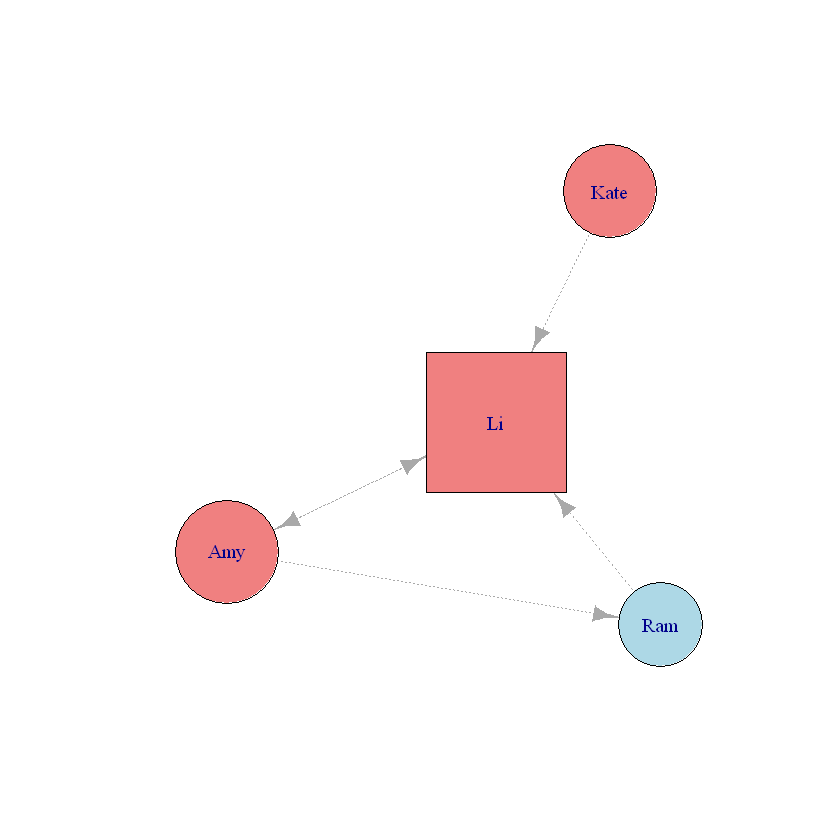

In [107]:
# changing the linetype for all edges
set.seed(123)
plot(g2,
     vertex.color = vex.color,
     vertex.shape = vex.shapes,
     vertex.size = vex.size,
     edge.lty = 3)

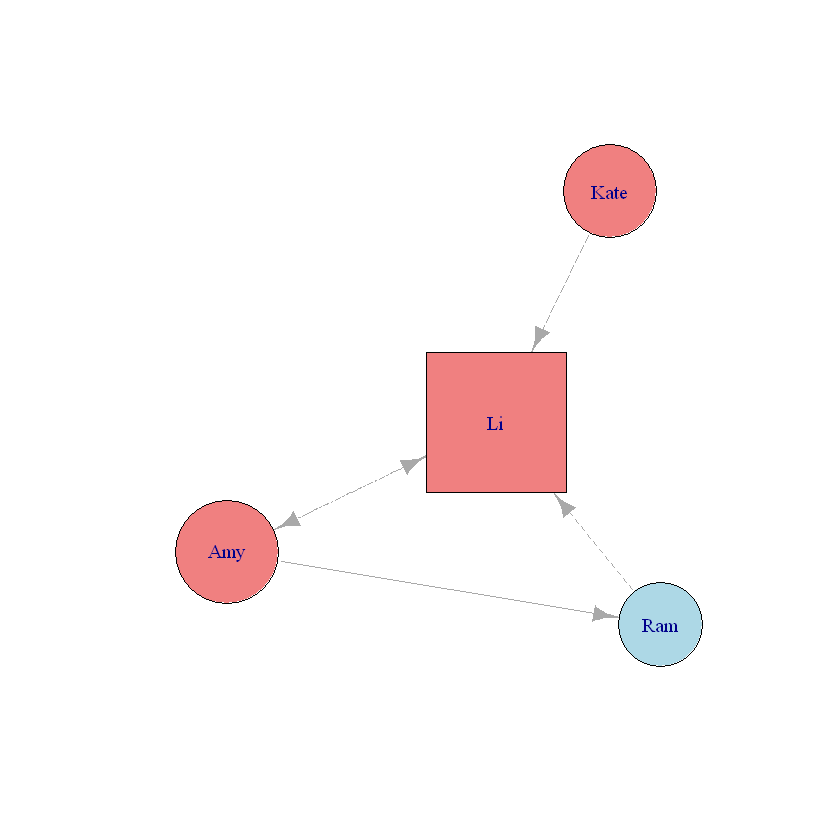

In [108]:
# giving each edge a different type of line
set.seed(123)
plot(g2,
     vertex.color = vex.color,
     vertex.shape = vex.shapes,
     vertex.size = vex.size,
     edge.lty = c(1,2,3,4,5))

We need to transform the vector of relationship types into a vector of valid edge line parameters

In [112]:
# initilaizing new vector
edge.Type <- seq_along(E(g2)$relationships)

# translating relationship types into valid edge line attributes
edge.Type[E(g2)$relationships == "supervised by"] <- 3
edge.Type[E(g2)$relationships == "likes"] <- 5
edge.Type[E(g2)$relationships == "mentoring"] <- 7

We can now plot the graph with different edges based on different relationships

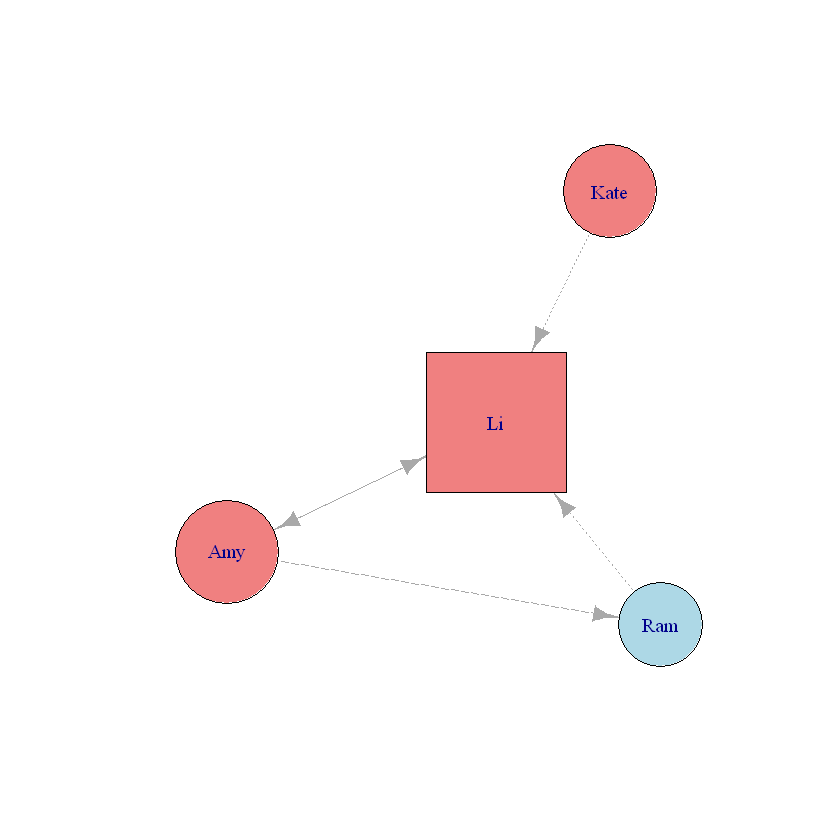

In [115]:
# plotting the graph
set.seed(123)
plot(g2,
     vertex.color = vex.color,
     vertex.shape = vex.shapes,
     vertex.size = vex.size,
     edge.lty = edge.Type)

##### Interaction Frequency & Edge Width

We can incorporate the information about how frequently people interact in the plot as the width of the edges
that are connecting the vertices

We can change the width of the edges using the edge.width command (default is 1)

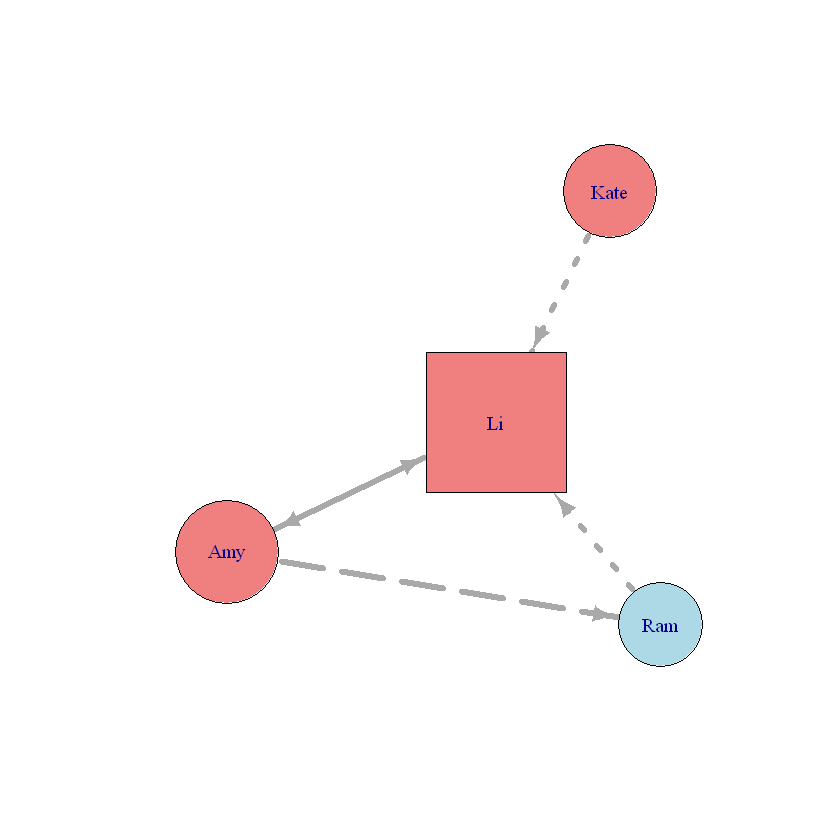

In [117]:
# changing the width of all edges
set.seed(123)
plot(g2,
     vertex.color = vex.color,
     vertex.shape = vex.shapes,
     vertex.size = vex.size,
     edge.lty = edge.Type,
     edge.width = 5)

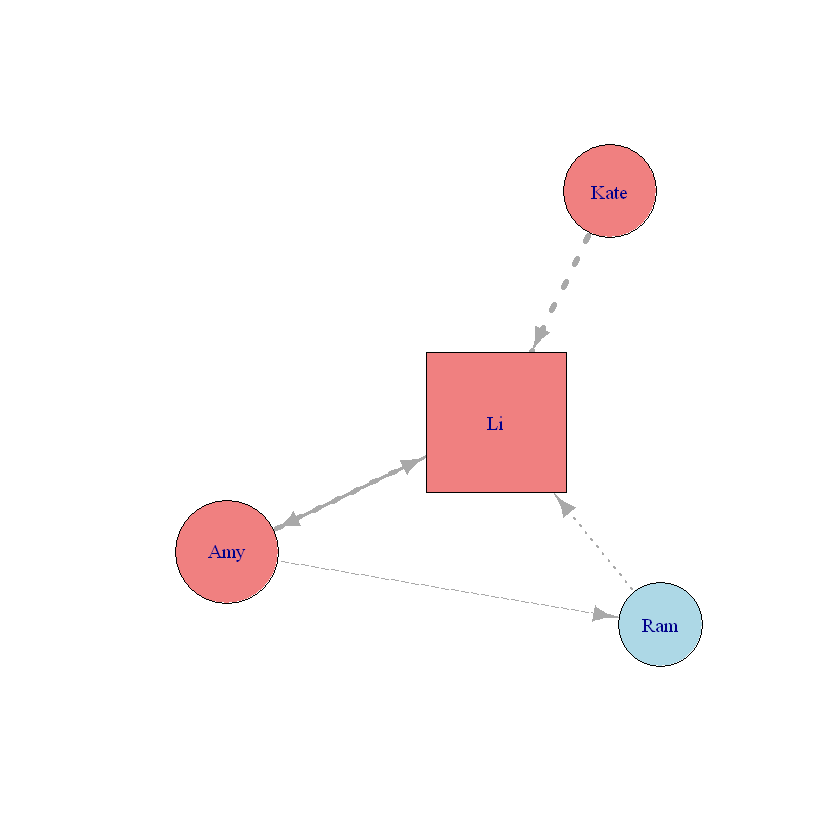

In [118]:
# giving each edge a different width
set.seed(123)
plot(g2,
     vertex.color = vex.color,
     vertex.shape = vex.shapes,
     vertex.size = vex.size,
     edge.lty = edge.Type,
     edge.width = c(1,2,3,4,5))

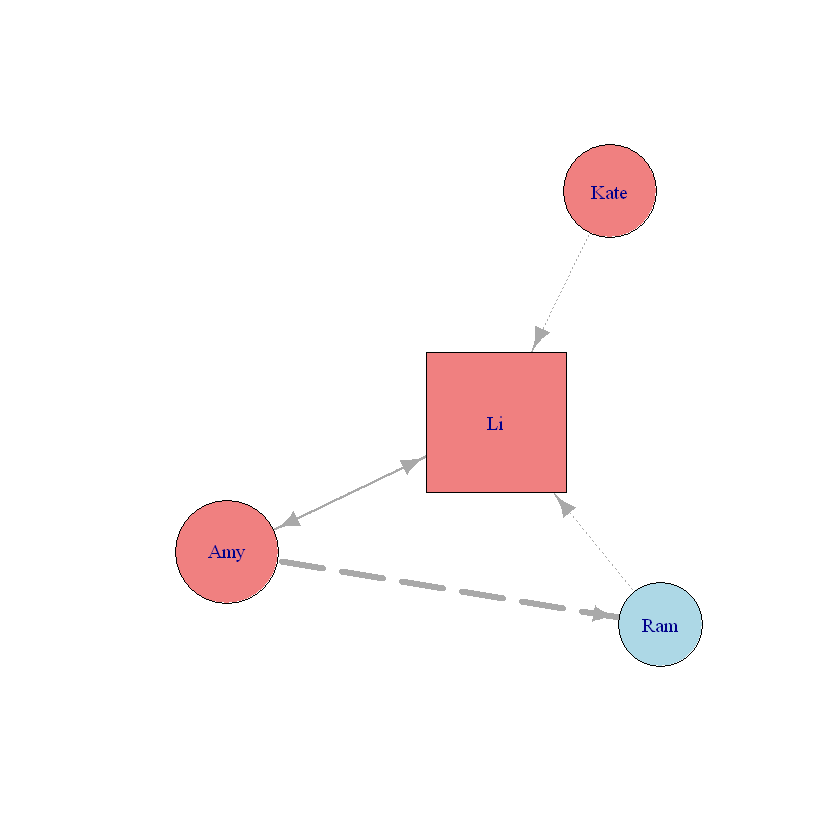

In [119]:
# We can use the interaction frequency as a direct input for the edge width
set.seed(123)
plot(g2,
     vertex.color = vex.color,
     vertex.shape = vex.shapes,
     vertex.size = vex.size,
     edge.lty = edge.Type,
     edge.width = E(g2)$contactFreq)

There are a lot of different styling options for plotting graph objects, you can see an overview here:

In [ ]:
plot("Some Network",
     vertex.size = 25, # Size of the Vertices, default is 15
     vertex.size2 = 15, # second size parameter, only needed for some shapes (e.g. rectangles); default is 15
     vertex.color = "SkyBlue2", # Vertex colour; default is "SkyBlue2", if numeric then the current palette is used; also takes named colours or RGB values starting with # and having 3-4 bytes, no colour -> supply NA
     vertex.frame.color = "black", # colour of vertex frame, default is "black", same formats as for colour are allowed, no frame -> supply NA
     vertex.shape = "circle", # shape of the vertices, supports “circle”, “square”, “csquare”, “rectangle”, “crectangle”, “vrectangle”, “pie”, ‘sphere’, and “none”
     vertex.label = c(), # labels for vertices, default are vertexs Ids, supply NA if you dont want to display any labels
     vertex.label.family = "", # the font family to use for the labels
     vertex.label.font="", # the font within the font family to use for labels
     vertex.label.cex = 1, # font size for vertex labels, default is 1
     vertex.label.dist= 0, # distance of the label from the center of the vertex, default is 0
     vertex.label.degree= -pi/4, #  It defines the position of the vertex labels, relative to the center of the vertices. It is interpreted as an angle in radian, zero means ‘to the right’, and ‘pi’ means to the left, up is -pi/2 and down is pi/2.The default value is -pi/4.
     vertex.label.color = "black", # colour of the vertex labels, default is "black", takes some input is vertex.color
     edge.color = "", # color of the edges, default is "darkgrey", takes some input is vertex.color
     edge.width = "", # the width of the edges, deafult value is 1
     edge.arrow.size = 0.5, # size of the arrows for directed edges, default is 1
     edge.arrow.width = 0.5, # width of the arrows for directed edges, default is 1
     edge.lty = 1, # The line type for the edges. Almost the same format is accepted as for the standard graphics par, 0 and “blank” mean no edges, 1 and “solid” are for solid lines, the other possible values are: 2 (“dashed”), 3 (“dotted”), 4 (“dotdash”), 5 (“longdash”), 6 (“twodash”). 
     edge.label = NA, #     The edge labels. They will be converted to character. Specify NA to omit edge labels. Edge labels are omitted by default.
     edge.label.family = , # Font family of the edge labels. See the vertex parameter with the same name for the details.
     edge.label.font = , # The font for the edge labels. See the corresponding vertex parameter discussed earlier for details
     edge.label.cex = 1, # The font size for the edge labels, see the corresponding vertex parameter for details.
     edge.label.color = c("green","blue"), # The color of the edge labels, see the color vertex parameters on how to specify colors.
     edge.label.x = NA, # horizontal coordinates for edge labels
     edge.label.y = NA, # vertical coordinates for edge labels
     edge.curved = 0, # default is 0, meaning straight edges, can be a positive (blockwise) or negative (counter-clockwise) bent
     edge.arrow.mode = , # This parameter can be used to specify for which edges should arrows be drawn. If it is integer then 0 means no arrows, 1 means backward arrows, 2 is for forward arrows and 3 for both. If it is a character vector then “<” and “<-” specify backward, “>” and “->” forward arrows and “<>” and “<->” stands for both arrows. All other values mean no arrows, perhaps you should use “-” or “–” to specify no arrows. 
     edge.loop.angle = 0, # Gives the angle in radian for plotting loop edges. See the label.dist vertex parameter to see how this is interpreted. The default value is 0.
     edge.loop.angle2 = 0, # Default is 0. Gives the second angle in radian for plotting loop edges. This is only used in 3D, loop.angle is enough in 2D. 
     layout = layout_nicely(), # takes either a function or a matrix with coordinstes for each vertex as Input. Default is the function layout_nicely. See http://igraph.org/r/doc/layout_nicely.html for a list of build-in layout function
     margin = c(0,0,0,0), # The amount of empty space below, over, at the left and right of the plot, it is a numeric vector of length four. Default is c(0,0,0,0)
     palette = "categorical_pal", # The color palette to use for vertex color. The default is categorical_pal, which is a color-blind friendly categorical palette. See its manual page for details and other palettes.
     rescale = TRUE, # Logical constant, whether to rescale the coordinates to the [-1,1]x[-1,1](x[-1,1]) interval. Default is TRUE
     asp = 1, # Defaults to 1. A numeric constant, it gives the aspect ratio. Supply 0 here if you don't want to give an aspect ratio.
     main = "", # heading for the graph
     frame = FALSE, # Boolean, whether to plot a frame around the graph.  Defaults to FALSE
     sub = "", # Subtitle of the main plot, the default is empty.
     xlab = "", # Title for the x axis, the default is empty 
     ylab = ""  # Title for the y axis, the default is empty 
)